In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load 
mouse_data_file = "Resources/mouse_drug_data.csv"
clinicaltrial_data_file = "Resources/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_data_file)
clinical_trial = pd.read_csv(clinicaltrial_data_file)

# Combine the data into a single dataset
data_set = pd.merge(mouse_data,clinical_trial, on ="Mouse ID")

# Display the data table for preview
data_set.head()

Mouse ID      Drug  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     f234  Stelasyn          0           45.000000                 0
1     f234  Stelasyn          5           47.313491                 0
2     f234  Stelasyn         10           47.904324                 0
3     f234  Stelasyn         15           48.735197                 1
4     f234  Stelasyn         20           51.112713                 2

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# mean_tumors_list =[]
mean_tumor = data_set.groupby(["Drug","Timepoint"]).mean()["Tumor Volume (mm3)"]
# mean_tumors.append(mean_tumor)
# Convert to DataFrame
# mean_tumors = pd.DataFrame(mean_tumors_list)
tumor_df=pd.DataFrame(mean_tumor).reset_index()
tumor_df.head()

Drug  Timepoint  Tumor Volume (mm3)
0  Capomulin          0           45.000000
1  Capomulin          5           44.266086
2  Capomulin         10           43.084291
3  Capomulin         15           42.064317
4  Capomulin         20           40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_error = data_set.groupby(["Drug","Timepoint"]).sem()["Tumor Volume (mm3)"]
# tumor_df.sem(axis=0,skipna = False )
# Convert to DataFrame
tumor_error_df = pd.DataFrame(tumor_error).reset_index()
# Preview DataFrame
tumor_error_df.head()

Drug  Timepoint  Tumor Volume (mm3)
0  Capomulin          0            0.000000
1  Capomulin          5            0.448593
2  Capomulin         10            0.702684
3  Capomulin         15            0.838617
4  Capomulin         20            0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked

In [5]:
mean_capomulin = tumor_df.loc[tumor_df["Drug"] == "Capomulin",:]
mean_infubinol = tumor_df.loc[tumor_df["Drug"] == "Infubinol",:]
mean_ketapril = tumor_df.loc[tumor_df["Drug"] == "Ketapril",:]
mean_placebo = tumor_df.loc[tumor_df["Drug"] == "Placebo",:]

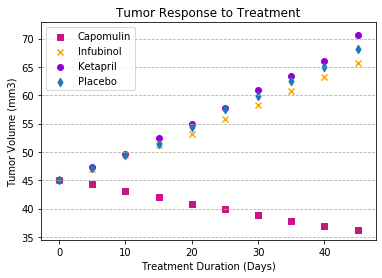

In [6]:
plt.scatter(mean_capomulin ["Timepoint"],mean_capomulin["Tumor Volume (mm3)"] ,marker = 's',color="mediumvioletred") 
plt.scatter(mean_infubinol ["Timepoint"],mean_infubinol["Tumor Volume (mm3)"] ,marker = 'x',color="orange") 
plt.scatter(mean_ketapril ["Timepoint"],mean_ketapril["Tumor Volume (mm3)"] ,marker = 'o',color="darkviolet")
plt.scatter(mean_placebo ["Timepoint"],mean_placebo["Tumor Volume (mm3)"] ,marker = 'd') 
plt.title("Tumor Response to Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(which='major', axis='y', linestyle='--')
plt.legend(["Capomulin","Infubinol","Ketapril","Placebo"])


In [7]:
# Save plot 
plt.savefig("../Resources")


<Figure size 432x288 with 0 Axes>

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met = data_set.groupby(["Drug","Timepoint"]).mean()["Metastatic Sites"]
# Convert to DataFrame
mean_met_df = pd.DataFrame(mean_met).reset_index()
# Preview DataFrame
mean_met_df.head()

Drug  Timepoint  Metastatic Sites
0  Capomulin          0          0.000000
1  Capomulin          5          0.160000
2  Capomulin         10          0.320000
3  Capomulin         15          0.375000
4  Capomulin         20          0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_error = data_set.groupby(["Drug","Timepoint"]).sem()["Metastatic Sites"]
# Convert to DataFrame
met_error_df = pd.DataFrame(met_error).reset_index()
# Preview DataFrame
met_error_df.head()

Drug  Timepoint  Metastatic Sites
0  Capomulin          0          0.000000
1  Capomulin          5          0.074833
2  Capomulin         10          0.125433
3  Capomulin         15          0.132048
4  Capomulin         20          0.161621

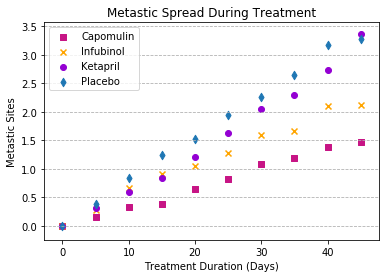

In [10]:
# Generate the Plot (with Error Bars)
mean_capomulin = mean_met_df.loc[mean_met_df["Drug"] == "Capomulin",:]
mean_infubinol = mean_met_df.loc[mean_met_df["Drug"] == "Infubinol",:]
mean_ketapril = mean_met_df.loc[mean_met_df["Drug"] == "Ketapril",:]
mean_placebo = mean_met_df.loc[mean_met_df["Drug"] == "Placebo",:]
# Save the Figure
plt.scatter(mean_capomulin ["Timepoint"],mean_capomulin["Metastatic Sites"] ,marker = 's',color="mediumvioletred") 
plt.scatter(mean_infubinol ["Timepoint"],mean_infubinol["Metastatic Sites"] ,marker = 'x',color="orange") 
plt.scatter(mean_ketapril ["Timepoint"],mean_ketapril["Metastatic Sites"] ,marker = 'o',color="darkviolet")
plt.scatter(mean_placebo ["Timepoint"],mean_placebo["Metastatic Sites"] ,marker = 'd') 
# Show the Figure
plt.title("Metastic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastic Sites")
plt.grid(which='major', axis='y', linestyle='--')
plt.legend(["Capomulin","Infubinol","Ketapril","Placebo"])


In [16]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = data_set.groupby(["Drug","Timepoint"]).count()["Mouse ID"]#/["Mouse ID"].loc[0]*100
# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count).reset_index()
# Preview DataFrame
mice_count_df.head()

Drug  Timepoint  Mouse ID
0  Capomulin          0        25
1  Capomulin          5        25
2  Capomulin         10        25
3  Capomulin         15        24
4  Capomulin         20        23

In [17]:
# Save plot 
plt.savefig("../Resources")

<Figure size 432x288 with 0 Axes>

In [18]:
mice_percent = mice_count_df["Mouse ID"]/mice_count_df["Mouse ID"].iloc[0] *100


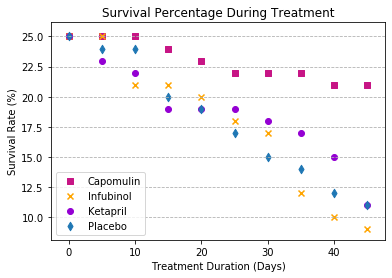

In [19]:
# Generate the Plot (Accounting for percentages)
count_capomulin = mice_count_df.loc[mice_count_df["Drug"] == "Capomulin",:]
count_infubinol = mice_count_df.loc[mice_count_df["Drug"] == "Infubinol",:]
count_ketapril = mice_count_df.loc[mice_count_df["Drug"] == "Ketapril",:]
count_placebo = mice_count_df.loc[mice_count_df["Drug"] == "Placebo",:]
# Save the Figure
plt.scatter(count_capomulin ["Timepoint"],(count_capomulin["Mouse ID"]) ,marker = 's',color="mediumvioletred") 
plt.scatter(count_infubinol ["Timepoint"],count_infubinol["Mouse ID"] ,marker = 'x',color="orange") 
plt.scatter(count_ketapril ["Timepoint"],count_ketapril["Mouse ID"] ,marker = 'o',color="darkviolet")
plt.scatter(count_placebo ["Timepoint"],count_placebo["Mouse ID"] ,marker = 'd')
# Show the Figure
plt.title("Survival Percentage During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid(which='major', axis='y', linestyle='--')
plt.legend(["Capomulin","Infubinol","Ketapril","Placebo"])

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm